# Testing the RL Agent on different environments + Performance Evaluation


## System Imports

In [1]:
import sys
import os

# Add META-RL-SNAKE (project root) to path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from meta_snake_rl.env.snake_env import SnakeEnv, select_action, get_state
from meta_snake_rl.utils.constants import ACTIONS, OPPOSITE

## Import training loops for various algorithms


In [ ]:
from meta_snake_rl.train.training_loops import q_learning_loop, sarsa_loop, meta_q_loop, meta_sarsa_loop
from meta_snake_rl.test.test_policy import test_policy

## Create plotting function

In [4]:
def plot_rewards_progress(episode_rewards):
    plt.figure(figsize=(12, 6))
    plt.plot(episode_rewards, label='Episode Reward')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Training Progress")
    plt.grid(True)
    plt.legend()
    plt.show()

## Basic Variation

### Q-Learning

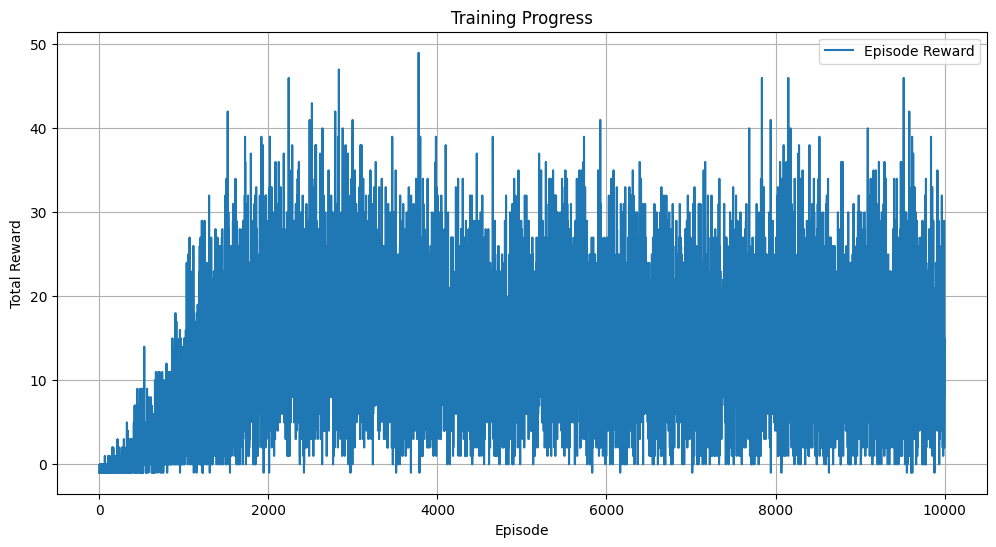

In [5]:
alpha, gamma, epsilon, min_epsilon, decay_rate, episodes = 0.134, 0.921, 1.0, 0.01, 0.99797, 10000
Q_Learning_env = SnakeEnv(grid_size=15, variant="classic")
Q_Learning_Q, Q_Learning_Rewards = q_learning_loop(Q_Learning_env, alpha, gamma, epsilon, min_epsilon, decay_rate, episodes)
plot_rewards_progress(Q_Learning_Rewards)

### SARSA

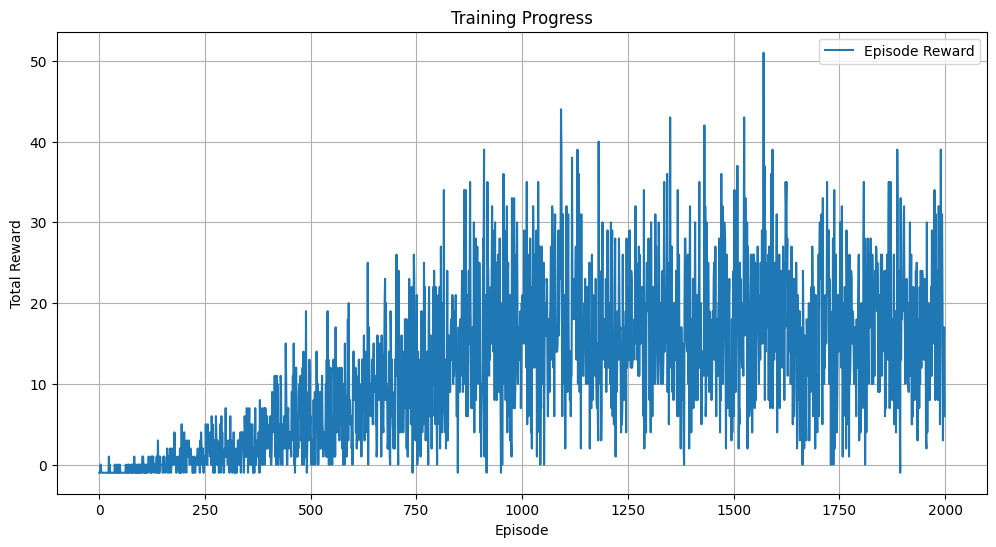

In [6]:
alpha, gamma, epsilon, min_epsilon, decay_rate, episodes = 0.104, 0.981, 1.0, 0.01, 0.99592, 2000
SARSA_env = SnakeEnv(grid_size=15, variant="classic")
SARSA_q, SARSA_Learning_Rewards = sarsa_loop(SARSA_env, alpha, gamma, epsilon, min_epsilon, decay_rate, episodes)
plot_rewards_progress(SARSA_Learning_Rewards)

## Obstacles Variation

#### Run using the classic version to observe differences

In [7]:
# This uses Q-Learning and SARSAs above

test_policy(Q_Learning_Q, variant="classic")        
test_policy(Q_Learning_Q, variant="moving_apple")    
test_policy(Q_Learning_Q, variant="obstacles")  

Avg reward on classic: 17.04
Avg reward on moving_apple: -0.88
Avg reward on obstacles: -0.91


In [8]:
test_policy(SARSA_q, variant="classic")        
test_policy(SARSA_q, variant="moving_apple")    
test_policy(SARSA_q, variant="obstacles")  

Avg reward on classic: 20.09
Avg reward on moving_apple: -0.89
Avg reward on obstacles: -0.93


### Obvious finding!
Training only on classic makes it terrible at other policies!